In [2]:
#preprocessing the data
import pandas as pd
data_red = pd.read_excel('./redwine.xlsx')
data_white = pd.read_excel('./whitewine.xlsx')

# 檢視資料
# data_red
# data_white

In [3]:
#合併資料
data = pd.concat([data_red, data_white], ignore_index=True)
data.to_excel('merge.xlsx')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
#匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LogisticRegression
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import random

In [5]:
#preprocessing onehot-encoding
data["wine_label"]=data["wine"].astype("category").cat.codes
x=data.iloc[:,:14]
y=data["wine_label"]
x.drop(["wine","wine_label"],axis=1,inplace=True)

#檢視資料
#x
#y

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)
scaler=MinMaxScaler(feature_range=(0,1))

In [30]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
lr = 0.06
import numpy as np
# Parameters initialization
weights = np.random.normal(0, 0.1, 12)
bias = random.normalvariate(0, 0.1)

m = x_train.shape[0]
for epoch in range(1000):

    # Forward pass
    Z=np.dot(x_train,weights)+ bias
    A= 1/(1+np.exp(-Z))
    #Loss Computation
    J = np.sum(-(y_train * np.log(A) + (1 - y_train) * np.log(1 - A))) / m

    # Gradient computation
    dZ = A - y_train
    dw = np.dot(dZ, x_train) / m
    db = np.sum(dZ) / m
    
    # Update weights
    weights = weights - lr * dw
    biais = bias - lr * db
    
    if epoch % 10 == 0:
        print("epoch %s - loss %s" % (epoch, J))

epoch 0 - loss 0.6935168032214418
epoch 10 - loss 0.6548493357262483
epoch 20 - loss 0.6248977891051416
epoch 30 - loss 0.6014766234730616
epoch 40 - loss 0.582941550556745
epoch 50 - loss 0.5680703385215267
epoch 60 - loss 0.5559587188923438
epoch 70 - loss 0.5459376394381328
epoch 80 - loss 0.5375106093464209
epoch 90 - loss 0.5303074584203211
epoch 100 - loss 0.5240506376484222
epoch 110 - loss 0.5185307777498233
epoch 120 - loss 0.5135889631481433
epoch 130 - loss 0.5091038390274617
epoch 140 - loss 0.5049821897551907
epoch 150 - loss 0.5011520145826652
epoch 160 - loss 0.49755740675049
epoch 170 - loss 0.4941547416908231
epoch 180 - loss 0.49090982120766047
epoch 190 - loss 0.4877957202480482
epoch 200 - loss 0.48479115343737633
epoch 210 - loss 0.48187922865381283
epoch 220 - loss 0.4790464906666617
epoch 230 - loss 0.4762821835177794
epoch 240 - loss 0.4735776788486826
epoch 250 - loss 0.47092603083657397
epoch 260 - loss 0.46832162824769286
epoch 270 - loss 0.4657599213639493
e

In [36]:
preds=[]
for i in x_test:
    Z=np.dot(i,weights)+bias
    A=1+(1/np.exp(-Z))
    if A >0.5 :
        preds.append(1)
    elif A<=0.5:
        preds.append(0)

In [37]:
print(classification_report(y_test,preds,target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.00      0.00      0.00       341
       white       0.74      1.00      0.85       959

    accuracy                           0.74      1300
   macro avg       0.37      0.50      0.42      1300
weighted avg       0.54      0.74      0.63      1300



C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
preds_lg=lg.predict(x_test)

In [39]:
print(classification_report(y_test,preds_lg,target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.99      0.95      0.97       341
       white       0.98      1.00      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.98      1300
weighted avg       0.98      0.98      0.98      1300



In [40]:
print(lg.score(x_train,y_train))
print(accuracy_score(y_test,preds))
print(accuracy_score(y_test,preds_lg))

0.9878776217048297
0.7376923076923076
0.9830769230769231


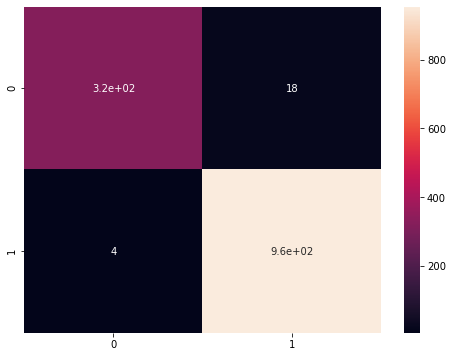

In [43]:
cm=confusion_matrix(y_test,preds_lg)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()